<h1> Assignment 4 </h1>



<h3> <font color="darkblue">Visualize two datasets </font> </h3>
<blockquote> 
This notebook displays one solution for Applied Plotting, Charting & Data Representation in Python 4th week assignment. 
</blockquote>
<blockquote>
This assignment requires to find at least two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic related to the region of Giza, Giza, Egypt, or Egypt more broadly.
</blockquote>
<blockquote>
    <p>The solution below will Answer following question:
        <font color="darkblue">How does Literacy Rate differs among Females & Males in Egypt Vs. Mexico?</font></p>
    <p> Domain: <font color="darkblue">Gender/Education</font></p>
    <p> Region: <font color="darkblue">Egypt & Mexico </font></p>
    <p> Data-set 1: 
    <a href="https://data.humdata.org/dataset/world-bank-gender-indicators-for-egypt-arab-rep">Egypt data-set</a></p>
    <p> Data-set 2:
    <a href="https://data.humdata.org/dataset/world-bank-gender-indicators-for-mexico">Mexico data-set</a> </p>
</blockquote>

### Imports

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import os
import re

### Reading in Data-sets

In [81]:
debug = 1
file1_path = os.path.join(os.path.pardir,'Desktop','gender_egy.csv')
file2_path = os.path.join(os.path.pardir,'Desktop','gender_mex.csv')
df_gender_egy = pd.read_csv(file1_path, skiprows=[1])
df_gender_mex = pd.read_csv(file2_path, skiprows=[1])
if debug:
    print("File1 Path: "+file1_path)
    print("File2 Path: "+file2_path)
    print("--------------------------------------------------------------------------")
    print("Egypt Data-Set:")
    print("--------------------------------------------------------------------------")
    print(df_gender_egy.head(5))
    print("--------------------------------------------------------------------------")
    print("USA Data-Set:")
    print("--------------------------------------------------------------------------")
    print(df_gender_mex.head(5))
    print("--------------------------------------------------------------------------")

File1 Path: ..\Desktop\gender_egy.csv
File2 Path: ..\Desktop\gender_mex.csv
--------------------------------------------------------------------------
Egypt Data-Set:
--------------------------------------------------------------------------
       Country Name Country ISO3  Year  \
0  Egypt, Arab Rep.          EGY  2016   
1  Egypt, Arab Rep.          EGY  2013   
2  Egypt, Arab Rep.          EGY  2016   
3  Egypt, Arab Rep.          EGY  2013   
4  Egypt, Arab Rep.          EGY  2008   

                                      Indicator Name  Indicator Code  Value  
0         Firms with female top manager (% of firms)  IC.FRM.FEMM.ZS    4.9  
1         Firms with female top manager (% of firms)  IC.FRM.FEMM.ZS    7.1  
2  Firms with female participation in ownership (...  IC.FRM.FEMO.ZS   17.8  
3  Firms with female participation in ownership (...  IC.FRM.FEMO.ZS   16.1  
4  Firms with female participation in ownership (...  IC.FRM.FEMO.ZS   34.0  
-------------------------------------

### Dropping unnecessary columns

In [82]:
df_gender_egy.drop(['Country Name','Country ISO3','Indicator Code'], axis=1, inplace= True)
df_gender_mex.drop(['Country Name','Country ISO3','Indicator Code'], axis=1, inplace= True)
if debug:
    print("Egypt Data-Set:")
    print("--------------------------------------------------------------------------")
    print(df_gender_egy.head(5))
    print("--------------------------------------------------------------------------")
    print("Mexico Data-Set:")
    print("--------------------------------------------------------------------------")
    print(df_gender_mex.head(5))
    print("--------------------------------------------------------------------------")

Egypt Data-Set:
--------------------------------------------------------------------------
   Year                                     Indicator Name  Value
0  2016         Firms with female top manager (% of firms)    4.9
1  2013         Firms with female top manager (% of firms)    7.1
2  2016  Firms with female participation in ownership (...   17.8
3  2013  Firms with female participation in ownership (...   16.1
4  2008  Firms with female participation in ownership (...   34.0
--------------------------------------------------------------------------
Mexico Data-Set:
--------------------------------------------------------------------------
   Year                                     Indicator Name     Value
0  2010         Firms with female top manager (% of firms)  14.60000
1  2010  Firms with female participation in ownership (...  25.70000
2  2006  Firms with female participation in ownership (...  24.80000
3  2018  Literacy rate, youth female (% of females ages...  99.38847
4

### Initial Dataset exploration

In [83]:
print("Egypt Data Shape: %s Rows & %s Columns" % (df_gender_egy.shape[0], df_gender_egy.shape[1]))
print("Mexico Data Shape: %s Rows & %s Columns" % (df_gender_mex.shape[0], df_gender_mex.shape[1]))
print("--------------------------------------------------------------------------")
print("Egypt Data-Set Info:")
print("--------------------------------------------------------------------------")
print(df_gender_egy.info())
print("--------------------------------------------------------------------------")
print("Mexico Data-Set:")
print("--------------------------------------------------------------------------")
print(df_gender_mex.info())

Egypt Data Shape: 4107 Rows & 3 Columns
Mexico Data Shape: 4373 Rows & 3 Columns
--------------------------------------------------------------------------
Egypt Data-Set Info:
--------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 3 columns):
Year              4107 non-null int64
Indicator Name    4107 non-null object
Value             4107 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 96.3+ KB
None
--------------------------------------------------------------------------
Mexico Data-Set:
--------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 3 columns):
Year              4373 non-null int64
Indicator Name    4373 non-null object
Value             4373 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.6+ KB
Non

In [84]:
print("Egypt Data-Set Unique Indicators:")
print("--------------------------------------------------------------------------")
print(pd.unique(df_gender_egy['Indicator Name']))

Egypt Data-Set Unique Indicators:
--------------------------------------------------------------------------
['Firms with female top manager (% of firms)'
 'Firms with female participation in ownership (% of firms)'
 'Literacy rate, youth female (% of females ages 15-24)'
 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'
 'Literacy rate, youth male (% of males ages 15-24)'
 'Literacy rate, adult female (% of females ages 15 and above)'
 'Literacy rate, adult male (% of males ages 15 and above)'
 'School enrollment, primary (gross), gender parity index (GPI)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'School enrollment, secondary (gross), gender parity index (GPI)'
 'School enrollment, tertiary (gross), gender parity index (GPI)'
 'School enrollment, preprimary, female (% gross)'
 'School enrollment, preprimary, male (% gross)'
 'Primary completion rate, female (% of relevant age group)'
 'Primary completion rate, male (% of relevant a

In [85]:
print("Mexico Data-Set Unique Indicators:")
print("--------------------------------------------------------------------------")
print(pd.unique(df_gender_mex['Indicator Name']))

Mexico Data-Set Unique Indicators:
--------------------------------------------------------------------------
['Firms with female top manager (% of firms)'
 'Firms with female participation in ownership (% of firms)'
 'Literacy rate, youth female (% of females ages 15-24)'
 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'
 'Literacy rate, youth male (% of males ages 15-24)'
 'Literacy rate, adult female (% of females ages 15 and above)'
 'Literacy rate, adult male (% of males ages 15 and above)'
 'School enrollment, primary (gross), gender parity index (GPI)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'School enrollment, secondary (gross), gender parity index (GPI)'
 'School enrollment, tertiary (gross), gender parity index (GPI)'
 'School enrollment, preprimary, female (% gross)'
 'School enrollment, preprimary, male (% gross)'
 'Primary completion rate, female (% of relevant age group)'
 'Primary completion rate, male (% of relevant 

### Categorizing Indicators for Further Aanalysis Beyond this Assignment Purpose

In [86]:
# Turning all indicators to lower case for easier string comparison
df_gender_egy['Indicator Name']=df_gender_egy['Indicator Name'].str.lower()


fm = [i for i in range(1,len(df_gender_egy)) if (re.search(r'\bfemale\b',df_gender_egy.iloc[i,1]) and re.search(r'\bmale\b',df_gender_egy.iloc[i,1]))]
male_to_female_egy = df_gender_egy.iloc[fm, :].copy()
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[fm])

fms = [i for i in range(1,len(df_gender_egy)) if (re.search(r'\bfemales\b',df_gender_egy.iloc[i,1]) and re.search(r'\bmales\b',df_gender_egy.iloc[i,1]))]
df_males_females_egy = df_gender_egy.iloc[fms, :].copy()
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[fms])

f = [i for i in range(1,len(df_gender_egy)) if re.search(r'\bfemale\b',df_gender_egy.iloc[i,1])]
df_female_egy = df_gender_egy.iloc[f, :].copy()
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[f])

m = [i for i in range(1,len(df_gender_egy)) if re.search(r'\bmale\b',df_gender_egy.iloc[i,1])]
df_male_egy = df_gender_egy.iloc[m, :].copy()
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[m])

fs = [i for i in range(1,len(df_gender_egy)) if re.search(r'\bfemales\b',df_gender_egy.iloc[i,1])]
df_female_egy = df_female_egy.append(df_gender_egy.iloc[fs, :].copy(), ignore_index=True)
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[fs])

ms = [i for i in range(1,len(df_gender_egy)) if re.search(r'\bmales\b',df_gender_egy.iloc[i,1])]
df_male_egy = df_male_egy.append(df_gender_egy.iloc[ms, :].copy(), ignore_index=True)
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[ms])

df_gpi_egy = df_gender_egy[df_gender_egy['Indicator Name'].str.contains('gpi')].copy()
df_gender_egy = df_gender_egy.drop(df_gpi_egy.index)

wm = [i for i in range(1,len(df_gender_egy)) if (re.search(r'\bwomen\b',df_gender_egy.iloc[i,1]) and re.search(r'\bmen\b',df_gender_egy.iloc[i,1]))]
df_males_females_egy = df_males_females_egy.append(df_gender_egy.iloc[wm, :].copy(), ignore_index=True)
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[wm])

w = [i for i in range(1,len(df_gender_egy)) if (re.search(r'\bwomen\b',df_gender_egy.iloc[i,1]))]
df_female_egy = df_female_egy.append(df_gender_egy.iloc[w, :].copy(), ignore_index=True)
df_gender_egy = df_gender_egy.drop(df_gender_egy.index[w])

if debug:
    print("Number of rows in df_gpi_egy: "+ str(df_gpi_egy.shape[0]))
    print("Number of rows in df_female_egy: "+ str(df_female_egy.shape[0]))
    print("Number of rows in df_male_egy: "+ str(df_male_egy.shape[0]))
    print("Number of rows in df_males_females_egy: "+ str(df_males_females_egy.shape[0]))
    print("Number of rows in male_to_female_egy: "+ str(male_to_female_egy.shape[0]))
    print("Number of rows left in df_gender_egy: "+ str(df_gender_egy.shape[0]))

Number of rows in df_gpi_egy: 174
Number of rows in df_female_egy: 2109
Number of rows in df_male_egy: 1528
Number of rows in df_males_females_egy: 23
Number of rows in male_to_female_egy: 44
Number of rows left in df_gender_egy: 229


In [87]:
# Turning all indicators to lower case for easier string comparison
df_gender_mex['Indicator Name']=df_gender_mex['Indicator Name'].str.lower()

fm = [i for i in range(1,len(df_gender_mex)) if (re.search(r'\bfemale\b',df_gender_mex.iloc[i,1]) and re.search(r'\bmale\b',df_gender_mex.iloc[i,1]))]
male_to_female_mex = df_gender_mex.iloc[fm, :].copy()
df_gender_mex = df_gender_mex.drop(df_gender_mex.index[fm])

fms = [i for i in range(1,len(df_gender_mex)) if (re.search(r'\bfemales\b',df_gender_mex.iloc[i,1]) and re.search(r'\bmales\b',df_gender_mex.iloc[i,1]))]
df_males_females_mex = df_gender_mex.iloc[fms, :].copy()
df_gender_mex = df_gender_mex.drop(df_gender_mex.index[fms])

f = [i for i in range(1,len(df_gender_mex)) if re.search(r'\bfemale\b',df_gender_mex.iloc[i,1])]
df_female_mex = df_gender_mex.iloc[f, :].copy()
df_gender_mex = df_gender_mex.drop(df_gender_mex.index[f])

m = [i for i in range(1,len(df_gender_mex)) if re.search(r'\bmale\b',df_gender_mex.iloc[i,1])]
df_male_mex = df_gender_mex.iloc[m, :].copy()
df_gender_mex = df_gender_mex.drop(df_gender_mex.index[m])

fs = [i for i in range(1,len(df_gender_mex)) if re.search(r'\bfemales\b',df_gender_mex.iloc[i,1])]
df_female_mex = df_female_mex.append(df_gender_mex.iloc[fs, :].copy(), ignore_index=True)
df_gender_mex = df_gender_mex.drop(df_gender_mex.index[fs])

ms = [i for i in range(1,len(df_gender_mex)) if re.search(r'\bmales\b',df_gender_mex.iloc[i,1])]
df_male_mex = df_male_mex.append(df_gender_mex.iloc[ms, :].copy(), ignore_index=True)
df_gender_mex = df_gender_mex.drop(df_gender_mex.index[ms])

df_gpi_mex = df_gender_mex[df_gender_mex['Indicator Name'].str.contains('gpi')].copy()
df_gender_mex = df_gender_mex.drop(df_gender_mex.index)

if debug:
    print("Number of rows in df_gpi_mex: "+ str(df_gpi_mex.shape[0]))
    print("Number of rows in df_female_mex: "+ str(df_female_mex.shape[0]))
    print("Number of rows in df_male_mex: "+ str(df_male_mex.shape[0]))
    print("Number of rows in df_males_females_mex: "+ str(df_males_females_mex.shape[0]))
    print("Number of rows in male_to_female_mex: "+ str(male_to_female_mex.shape[0]))
    print("Number of rows left in df_gender_mex: "+ str(df_gender_mex.shape[0]))

Number of rows in df_gpi_mex: 191
Number of rows in df_female_mex: 1981
Number of rows in df_male_mex: 1689
Number of rows in df_males_females_mex: 10
Number of rows in male_to_female_mex: 56
Number of rows left in df_gender_mex: 0


### Visualization Preparations for Egypt Data-Set

In [89]:
# Empty Indicator Names From Females/Males words
df_female_egy['Indicator Name'] =  df_female_egy['Indicator Name'].str.replace('females','')
df_female_egy['Indicator Name'] =  df_female_egy['Indicator Name'].str.replace('female','')
df_male_egy['Indicator Name'] =  df_male_egy['Indicator Name'].str.replace('males','')
df_male_egy['Indicator Name'] =  df_male_egy['Indicator Name'].str.replace('male','')

#print(df_female_egy[df_female_egy['Indicator Name'].str.contains('literacy', na=False)])

# Type-cast Indicators' values to floats
df_female_egy['Value'] = df_female_egy['Value'].astype(float)
df_male_egy['Value'] = df_male_egy['Value'].astype(float)
df_gpi_egy['Value'] = df_gpi_egy['Value'].astype(float)
male_to_female_egy['Value'] = male_to_female_egy['Value'].astype(float)
df_males_females_egy['Value'] = df_males_females_egy['Value'].astype(float)

# Type-cast years to integers
df_female_egy['Year'] = df_female_egy['Year'].astype(int)
df_male_egy['Year'] = df_male_egy['Year'].astype(int)
df_gender_egy['Year'] = df_gender_egy['Year'].astype(int)
df_gpi_egy['Year'] = df_gpi_egy['Year'].astype(int)
male_to_female_egy['Year'] = male_to_female_egy['Year'].astype(int)
df_males_females_egy['Year'] = df_males_females_egy['Year'].astype(int)

# Group By Indicator's name
females_group_egy = df_female_egy.groupby(['Indicator Name'])
males_group_egy = df_male_egy.groupby(['Indicator Name'])

### Visualization Preparations for Mexico Data-Set

In [90]:
# Empty Indicator Names From Females/Males words
df_female_mex['Indicator Name'] =  df_female_mex['Indicator Name'].str.replace('females','')
df_female_mex['Indicator Name'] =  df_female_mex['Indicator Name'].str.replace('female','')
df_male_mex['Indicator Name'] =  df_male_mex['Indicator Name'].str.replace('males','')
df_male_mex['Indicator Name'] =  df_male_mex['Indicator Name'].str.replace('male','')

# Type-cast Indicators' values to floats
df_female_mex['Value'] = df_female_mex['Value'].astype(float)

df_male_mex['Value'] = df_male_mex['Value'].astype(float)
df_gpi_mex['Value'] = df_gpi_mex['Value'].astype(float)
male_to_female_mex['Value'] = male_to_female_mex['Value'].astype(float)
df_males_females_mex['Value'] = df_males_females_mex['Value'].astype(float)

# Type-cast years to integers
df_female_mex['Year'] = df_female_mex['Year'].astype(int)
df_male_mex['Year'] = df_male_mex['Year'].astype(int)
df_gender_mex['Year'] = df_gender_mex['Year'].astype(int)
df_gpi_mex['Year'] = df_gpi_mex['Year'].astype(int)
male_to_female_mex['Year'] = male_to_female_mex['Year'].astype(int)
df_males_females_mex['Year'] = df_males_females_mex['Year'].astype(int)

# Group By Indicator's name
females_group_mex = df_female_mex.groupby(['Indicator Name'])
males_group_mex = df_male_mex.groupby(['Indicator Name'])

### Literacy Rate Visualization in Egypt

<IPython.core.display.Javascript object>


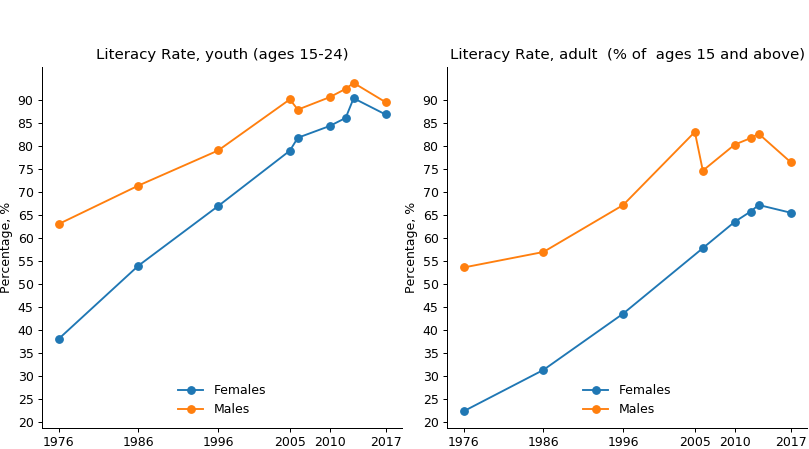

In [91]:
fig = plt.figure(figsize = (9, 5), facecolor = None) 
ax1 = plt.subplot(1, 2, 1)
plt.plot(females_group_egy.get_group('literacy rate, youth  (% of  ages 15-24)')['Year'], females_group_egy.get_group('literacy rate, youth  (% of  ages 15-24)')['Value'],'-o', label="Females")
plt.plot(
        males_group_egy.get_group('literacy rate, youth  (% of  ages 15-24)')['Year'], males_group_egy.get_group('literacy rate, youth  (% of  ages 15-24)')['Value'],'-o',label="Males")
plt.gca().set_yticks(np.arange(20, 95, step=5))
plt.gca().set_xticks(np.array([1976,1986,1996,2005,2010,2017]))
#plt.gca().set_xticklabels(['1976', '1986', '1996', '2005', '2010', '2017'])
plt.gca().set_title('Literacy Rate, youth (ages 15-24)')
plt.gca().set_ylabel('Percentage, %')
_ = plt.legend(loc=8, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)   
plt.tight_layout(pad = 0) 
plt.subplots_adjust(top=0.85)

ax2 = plt.subplot(1, 2, 2, sharey=ax1,sharex=ax1)
plt.plot(females_group_egy.get_group('literacy rate, adult  (% of  ages 15 and above)')['Year'], females_group_egy.get_group('literacy rate, adult  (% of  ages 15 and above)')['Value'],'-o', label="Females")
plt.plot(
        males_group_egy.get_group('literacy rate, adult  (% of  ages 15 and above)')['Year'], males_group_egy.get_group('literacy rate, adult  (% of  ages 15 and above)')['Value'],'-o',label="Males")
plt.gca().set_yticks(np.arange(20, 95, step=5))
plt.gca().set_xticks(np.array([1976,1986,1996,2005,2010,2017]))
#plt.gca().set_xticklabels(['1976', '1986', '1996', '2005', '2010', '2017'])
plt.gca().set_title('Literacy Rate, adult  (% of  ages 15 and above)')
plt.gca().set_ylabel('Percentage, %')
_ = plt.legend(loc=8, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)   
plt.tight_layout(pad = 0) 
plt.subplots_adjust(top=0.85)

### Literacy Rate Visualization in Mexico

<IPython.core.display.Javascript object>


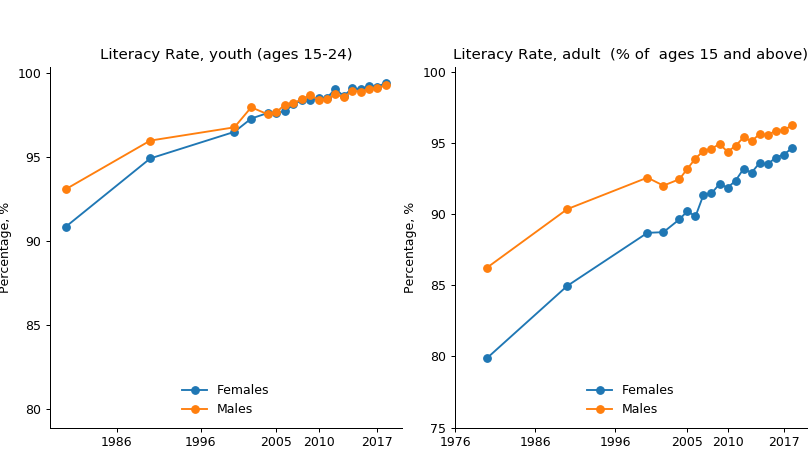

In [92]:
fig = plt.figure(figsize = (9, 5), facecolor = None) 
ax1 = plt.subplot(1, 2, 1)
plt.plot(females_group_mex.get_group('literacy rate, youth  (% of  ages 15-24)')['Year'], females_group_mex.get_group('literacy rate, youth  (% of  ages 15-24)')['Value'],'-o', label="Females")
plt.plot(
        males_group_mex.get_group('literacy rate, youth  (% of  ages 15-24)')['Year'], males_group_mex.get_group('literacy rate, youth  (% of  ages 15-24)')['Value'],'-o',label="Males")
plt.gca().set_yticks(np.arange(75, 105, step=5))
plt.gca().set_xticks(np.array([1976,1986,1996,2005,2010,2017]))
plt.gca().set_title('Literacy Rate, youth (ages 15-24)')
plt.gca().set_ylabel('Percentage, %')
_ = plt.legend(loc=8, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)   
plt.tight_layout(pad = 0) 
plt.subplots_adjust(top=0.85)

ax2 = plt.subplot(1, 2, 2, sharey=ax1,sharex=ax1)
plt.plot(females_group_mex.get_group('literacy rate, adult  (% of  ages 15 and above)')['Year'], females_group_mex.get_group('literacy rate, adult  (% of  ages 15 and above)')['Value'],'-o', label="Females")
plt.plot(
        males_group_mex.get_group('literacy rate, adult  (% of  ages 15 and above)')['Year'], males_group_mex.get_group('literacy rate, adult  (% of  ages 15 and above)')['Value'],'-o',label="Males")
plt.gca().set_yticks(np.arange(75, 105, step=5))
plt.gca().set_xticks(np.array([1976,1986,1996,2005,2010,2017]))
plt.gca().set_title('Literacy Rate, adult  (% of  ages 15 and above)')
plt.gca().set_ylabel('Percentage, %')
_ = plt.legend(loc=8, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)   
plt.tight_layout(pad = 0) 
plt.subplots_adjust(top=0.85)